## Лабораторная работа No1. Передискретизация, обесцвечивание и бинаризация растровых изображений 

a) Загрузка полноцветного изображения в формате *.bmp (3 цветовых канала);

b) Создание нового изображения в режиме полутона (1 яркостный канал);

c) Попиксельный расчёт яркости нового изображения на основе полноцветного путём усреднения по каналам;

d) Сохранение полутонового изображения в формат *.bmp.

In [4]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

In [5]:
def grayscale(image):
    image.show()
    imshow(np.asarray(image))
    for x in range(width):
        for y in range(height):
            brightness[x,y] = int(nppix[x,y][0]// 3 + pix[x,y][1]// 3 + pix[x,y][2]// 3)
            draw.point((x,y), (int(brightness[x,y]), int(brightness[x,y]), int(brightness[x,y])))
    image.show()
    imshow(np.asarray(image))
    image.save('grayscale-' + name)

In [6]:
def grayscale(img_path):
    image = Image.open(img_path)
    image.show()
    draw = ImageDraw.Draw(image)
    width = image.size[0]
    height = image.size[1]
    pix = image.load() 

    for x in range(width):
        for y in range(height):
            #r = pix[x, y][0] #Значения пикселя в изображении задаются в формате: (x,y),(red, green, blue),
            #g = pix[x, y][1] #где x,y — координаты, а числовые значения RGB находятся в диапазоне от 0 до 255. 
            #b = pix[x, y][2]
            #Y = (b + r + g) 
            #draw.point((x, y), (Y, Y, Y))          
            brightness[x,y] = int(pix[x,y][0]// 3 + pix[x,y][1]// 3 + pix[x,y][2]// 3)
            draw.point((x,y), (int(brightness[x,y]), int(brightness[x,y]), int(brightness[x,y])))
    image.save('grayscale-'+img_path, "BMP")
    image.show()

# Приведение полутонового изображения к монохромному методом пороговой обработки.

## Адаптивная бинаризация Ниблэка



In [7]:
import numpy as np
import math

In [8]:
def binarized(image, d1=15, d2=15, K=0.2, globalMin=25, globalMax=230):
    
    r1, r2 = math.floor(d1/2), math.floor(d2/2)
    for x in range(width):
        for y in range(height):
            if x < r1: a = 0
            else:  a = x - r1
            if (x + r1) < image.size[0]: b = x + r1
            else: b = width
            if y < r2: c = 0
            else: c = y - r2
            if (y + r2) < image.size[1]: d = y + r2
            else: d = height
            thrs[x,y] = np.average(brightness[a:b,c:d]) + K*np.std(brightness[a:b,c:d])
            if brightness[x,y] < globalMin : draw.point((x,y), (0, 0, 0))
            elif brightness[x,y] > globalMax : draw.point((x,y), (255, 255, 255))
            else:
                if brightness[x,y] > thrs[x,y] : draw.point((x,y), (255, 255, 255))
                else: draw.point((x,y), (0, 0, 0))
    image.save('binarized-' + name)
    image.show()
    imshow(np.asarray(image))
   # for x in range(width):
   #     for y in range(height):
   #         draw.point((x,y), (int(thrs[x,y]), int(thrs[x,y]), int(thrs[x,y])))
   # image.save('threshold-' + name)
   # image.show()
   # imshow(np.asarray(image))

In [23]:
name = 'new-2.bmp'
try: 
    image = Image.open(name)
except:
    print ("Файл с таким именем не найден:", name)
draw = ImageDraw.Draw(image)
width, height = image.size
pix = image.load()

In [24]:
brightness = np.zeros(shape=(width,height))
thrs = np.zeros(shape=(width,height))

In [25]:
grayscale(image)

AttributeError: 'BmpImageFile' object has no attribute 'read'

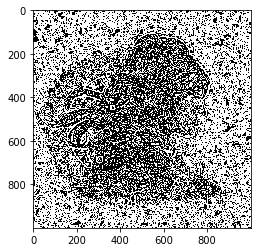

In [22]:
binarized(image)